<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [50]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [51]:
df.drop("User ID", axis = "columns",inplace = True)

In [52]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [53]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [54]:
if "Male" in df['Gender'].unique():
    df['Gender'] = df['Gender'].map({"Male": 1, "Female": 0})

Text(0.5, 1.0, 'Corr Matrix of Social Network Ads')

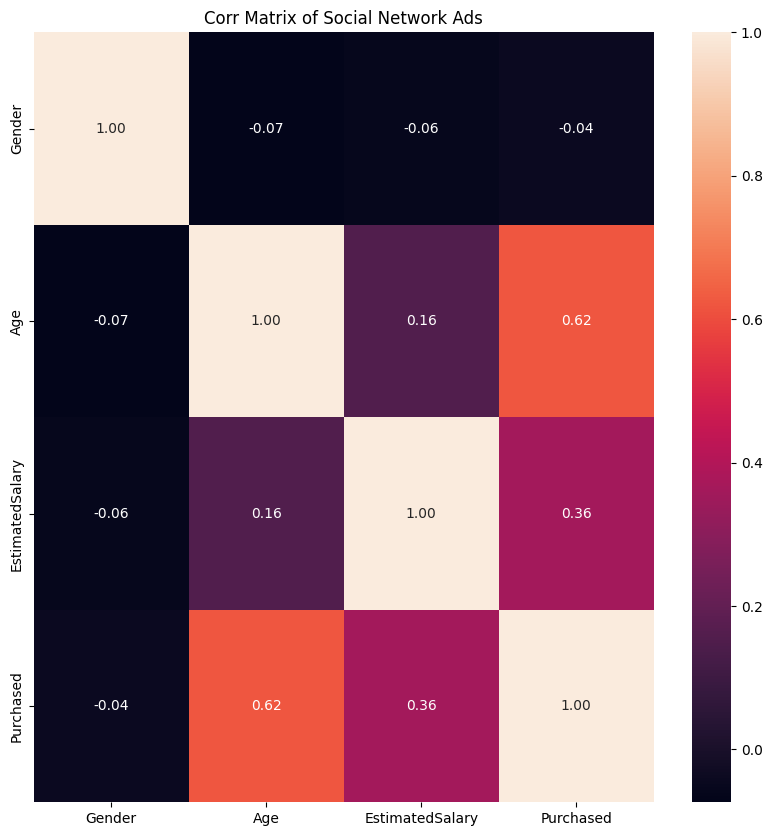

In [55]:
corr_m = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_m,annot = True, fmt = "0.2f")
plt.title("Corr Matrix of Social Network Ads")

In [56]:
x = df.drop('Purchased',axis="columns")
y = df['Purchased']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.33,random_state = 42)

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [59]:
model = SVC(max_iter = 10000)
model.fit(x_train,y_train)

SVC(max_iter=10000)

In [60]:
y_pre=model.predict(x_test)
acc=accuracy_score(y_test,y_pre)

In [61]:
print("accuracy score:",acc,"\n")
confusion_matrix(y_test,y_pre)

accuracy score: 0.946969696969697 



array([[76,  4],
       [ 3, 49]])